In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from google.colab import files

# Step 1: Exploratory Data Analysis (EDA)
# Load and check the translation dataset
print("Please upload your translation dataset file.")
uploaded_translation = files.upload()
translation_file_path = next(iter(uploaded_translation))
df = pd.read_excel(translation_file_path)

Please upload your translation dataset file.


Saving Final Translated Dataset.xlsx to Final Translated Dataset.xlsx


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CILUBA     2999 non-null   object
 1   FRANCAIS   2999 non-null   object
 2   ENGLISH    2999 non-null   object
 3   AFRIKAANS  2999 non-null   object
 4   ZULU       2999 non-null   object
 5   XHOSA      2999 non-null   object
 6   SCORE      3000 non-null   int64 
 7   SENTIMENT  3000 non-null   object
 8   NATURE     3000 non-null   object
dtypes: int64(1), object(8)
memory usage: 211.1+ KB
None

First 5 Rows:
      CILUBA   FRANCAIS      ENGLISH   AFRIKAANS               ZULU  \
0      Akaja    Arrange      Arrange        Reël              Hlela   
1  Akajilula  Rearrange   Rear range  Agterreeks  Ibanga elingemuva   
2      Akula      Parle        Speak       Praat            Khuluma   
3    Akulula    Reparle  Speak again  Praat weer      Khuluma futhi   
4      Aluja     

<ipython-input-2-1297a665cef1>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')
<ipython-input-2-1297a665cef1>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')
<ipython-input-2-1297a665cef1>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')
<ipython-input-2-1297a665cef1>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `le

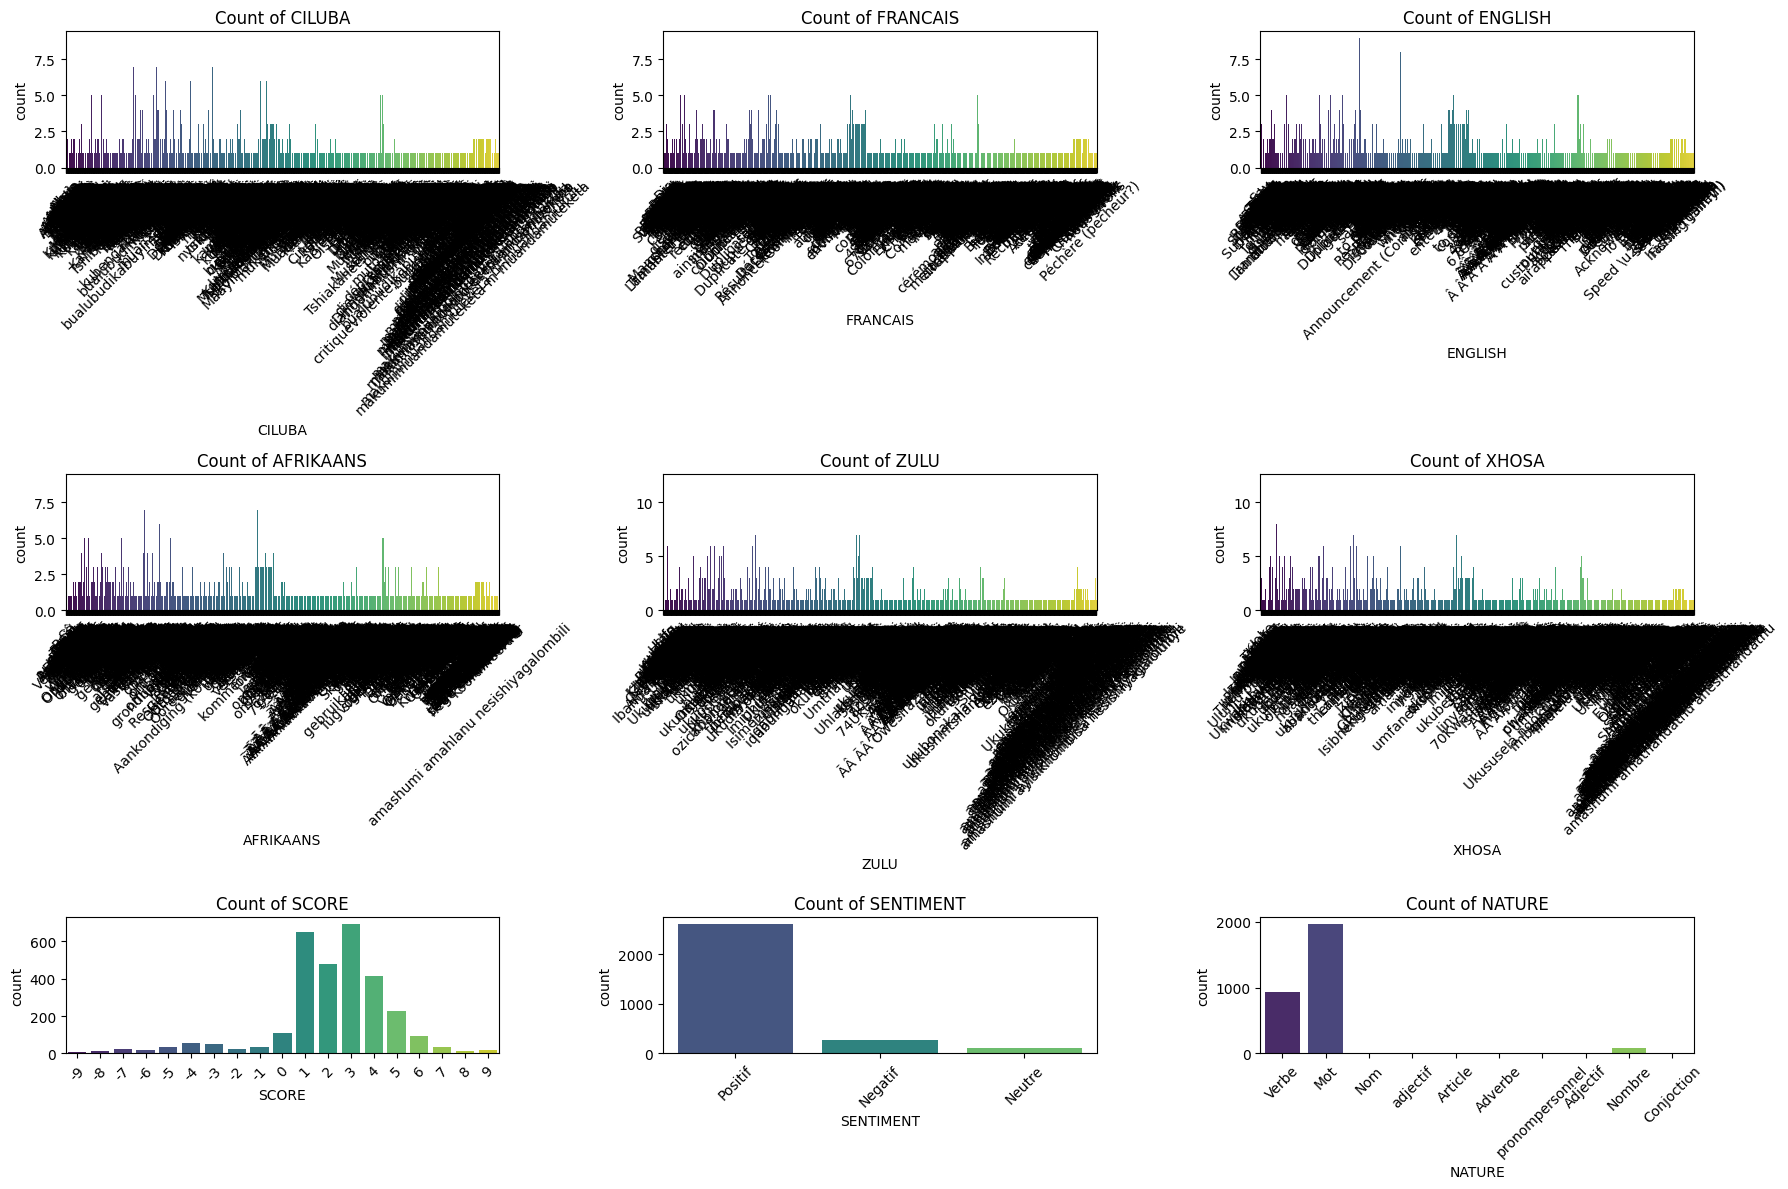

Available languages for translation: CILUBA, FRANCAIS, ENGLISH, AFRIKAANS, ZULU, XHOSA
Please upload your test dataset file with questions.
Saving Questions in French.xlsx to Questions in French.xlsx
Enter a target language for translation or 'all' for all languages: all
Translations and sentiments have been added to the test dataset.


In [ ]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of languages for further processing
languages = ['CILUBA', 'FRANCAIS', 'ENGLISH', 'AFRIKAANS', 'ZULU', 'XHOSA']

# Ensure columns are renamed consistently
expected_columns = ['CILUBA', 'FRANCAIS', 'ENGLISH', 'AFRIKAANS', 'ZULU', 'XHOSA', 'SCORE', 'SENTIMENT', 'NATURE']
if len(df.columns) == len(expected_columns):
    df.columns = expected_columns
else:
    raise ValueError("Expected 9 columns. Please check the dataset structure.")

# --- Exploratory Data Analysis (EDA) ---
# Basic information about the dataset
print("Dataset Information:")
print(df.info())

# Display the first few rows of the dataset
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Statistical summary of numerical columns
print("\nStatistical Summary of Numerical Columns:")
print(df.describe())

# Count of unique values per column
print("\nUnique Values Count per Column:")
print(df.nunique())

# Distribution of NATURE column
print("\nCount of 'NATURE' Categories:")
nature_counts = df['NATURE'].value_counts()
print(nature_counts)

# Distribution of SENTIMENT column
print("\nCount of 'SENTIMENT' Categories:")
sentiment_counts = df['SENTIMENT'].value_counts()
print(sentiment_counts)

# Distribution of SCORE column
print("\nCount of 'SCORE' Categories:")
score_counts = df['SCORE'].value_counts()
print(score_counts)

# Visualize the count of each column using a multi-panel plot (adjusted for 9 columns)
plt.figure(figsize=(18, 12))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)  # Adjusted for 9 columns, 3 rows by 3 columns grid
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Translation mapping dictionaries and language-specific lexiques
# Convert language keys to uppercase for consistency
translation_lexique = {
    lang.upper(): {other_lang.upper(): dict(zip(df[lang].str.lower(), df[other_lang])) for other_lang in languages if lang != other_lang}
    for lang in languages
}
lexiques = {lang.upper(): dict(zip(df[lang].str.lower(), df['SCORE'])) for lang in languages}
stop_words = {'is', 'a', 'the', 'an', 'and', 'of', 'to', 'in', 'on', 'do'}

# Language-specific Translation and Sentiment Analysis Function
def translate_and_analyze_sentiment(text, from_lang, to_lang):
    from_lang = from_lang.upper()
    to_lang = to_lang.upper()
    translation_dict = translation_lexique.get(from_lang, {}).get(to_lang, {})
    lexique = lexiques[to_lang]  # Use the lexique for the target language
    words = text.lower().split()
    translated_words = [
        translation_dict.get(word.strip(string.punctuation), word)
        for word in words if word.strip(string.punctuation) not in stop_words
    ]
    translated_text = ' '.join(translated_words)

    # Sentiment analysis based on the target language lexique
    word_scores = {
        word.strip(string.punctuation): lexique.get(word.strip(string.punctuation), 0)
        for word in translated_words
    }
    score = sum(word_scores.values()) / len(translated_words) if translated_words else 0  # Average score for normalization
    sentiment = (
        "Positif" if score > 0.05 else
        "Négatif" if score < -0.05 else
        "Neutre"
    )

    return translated_text, score, sentiment

# Display available languages
available_languages = ', '.join(languages)
print(f"Available languages for translation: {available_languages}")

# Example Test Translation and Sentiment
print("Please upload your test dataset file with questions.")
uploaded = files.upload()
test_file_path = next(iter(uploaded))
test_df = pd.read_excel(test_file_path)
test_df.columns = test_df.columns.str.strip()

# Define the column and target language
text_column_name = 'Questions'
target_language = input("Enter a target language for translation or 'all' for all languages: ").upper()

# Validate the target language input
if target_language != 'ALL' and target_language not in [lang.upper() for lang in languages]:
    raise ValueError(f"Invalid language choice. Choose from {', '.join(languages)} or 'all'.")

translations = []
sentiments = []

# Process each question in the test dataset
for i, row in test_df.iterrows():
    original_text = row[text_column_name]
    if target_language == 'ALL':
        row_translations = {}
        row_sentiments = {}
        for lang in languages:
            translated_text, score, sentiment = translate_and_analyze_sentiment(original_text, 'ENGLISH', lang)
            row_translations[lang] = translated_text
            row_sentiments[lang] = (score, sentiment)
        translations.append(row_translations)
        sentiments.append(row_sentiments)
    else:
        # Single language processing
        lang = target_language
        translated_text, score, sentiment = translate_and_analyze_sentiment(original_text, 'ENGLISH', lang)
        translations.append({lang.capitalize(): translated_text})
        sentiments.append({lang.capitalize(): (score, sentiment)})

# Convert translations and sentiments into DataFrame columns
translations_df = pd.DataFrame(translations)
sentiments_df = pd.DataFrame(sentiments)
test_df = pd.concat([test_df, translations_df, sentiments_df], axis=1)

print("Translations and sentiments have been added to the test dataset.")


Results for RandomForest:
Accuracy: 1.00
F1 Score: 1.00
ROC AUC Score: 0.99
Confusion Matrix:
[[ 78   0   2]
 [  0  42   0]
 [  0   0 778]]

Classification Report:
               precision    recall  f1-score   support

     Negatif       1.00      0.97      0.99        80
      Neutre       1.00      1.00      1.00        42
     Positif       1.00      1.00      1.00       778

    accuracy                           1.00       900
   macro avg       1.00      0.99      1.00       900
weighted avg       1.00      1.00      1.00       900

--------------------------------------------------


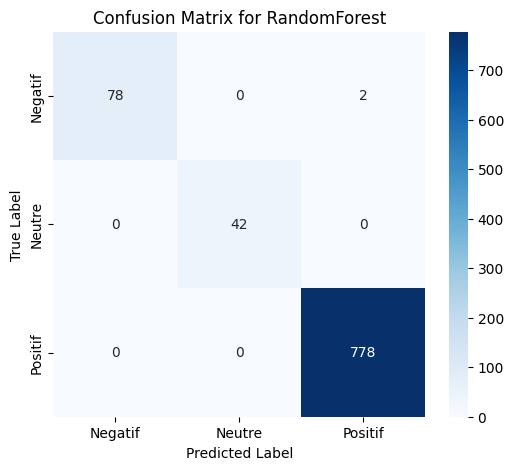

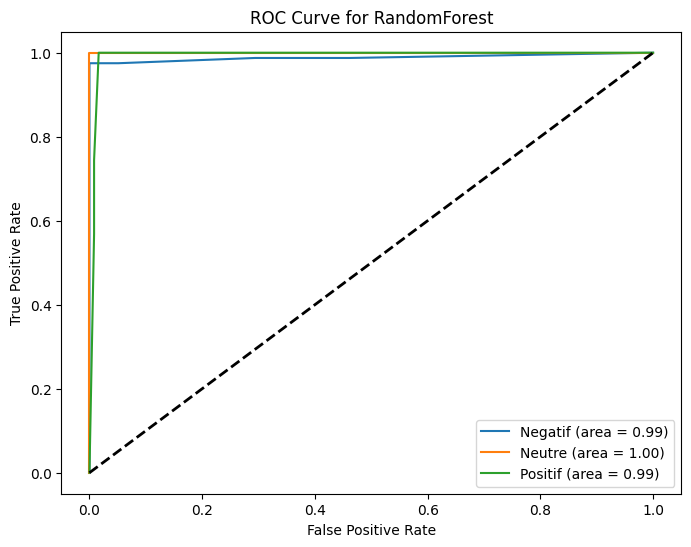

Results for LogisticRegression:
Accuracy: 1.00
F1 Score: 1.00
ROC AUC Score: 1.00
Confusion Matrix:
[[ 78   0   2]
 [  0  42   0]
 [  0   0 778]]

Classification Report:
               precision    recall  f1-score   support

     Negatif       1.00      0.97      0.99        80
      Neutre       1.00      1.00      1.00        42
     Positif       1.00      1.00      1.00       778

    accuracy                           1.00       900
   macro avg       1.00      0.99      1.00       900
weighted avg       1.00      1.00      1.00       900

--------------------------------------------------


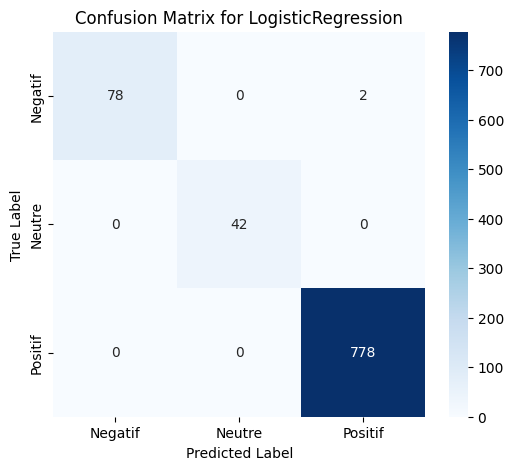

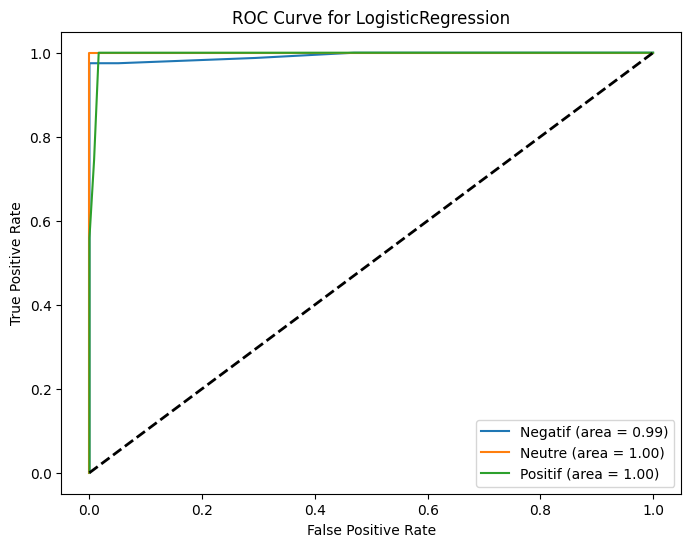

Results for SVC:
Accuracy: 1.00
F1 Score: 1.00
ROC AUC Score: 0.99
Confusion Matrix:
[[ 78   0   2]
 [  0  42   0]
 [  0   0 778]]

Classification Report:
               precision    recall  f1-score   support

     Negatif       1.00      0.97      0.99        80
      Neutre       1.00      1.00      1.00        42
     Positif       1.00      1.00      1.00       778

    accuracy                           1.00       900
   macro avg       1.00      0.99      1.00       900
weighted avg       1.00      1.00      1.00       900

--------------------------------------------------


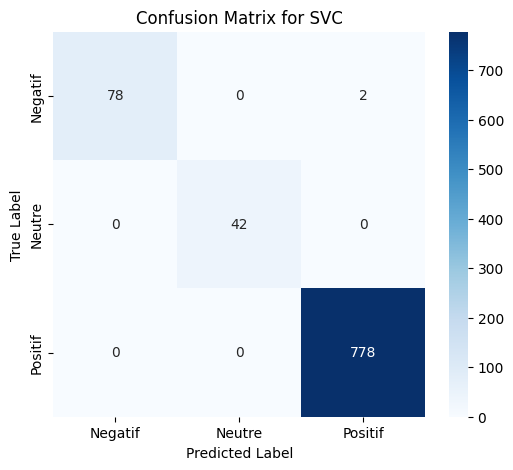

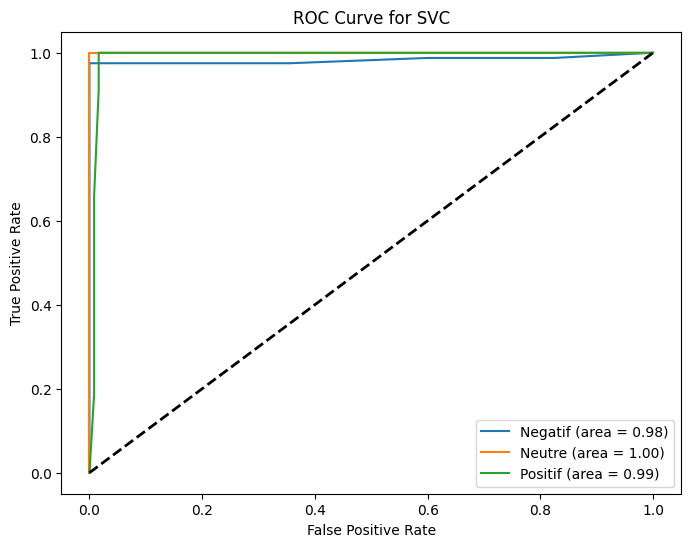

Results for NaiveBayes:
Accuracy: 0.99
F1 Score: 0.99
ROC AUC Score: 1.00
Confusion Matrix:
[[ 69   0  11]
 [  0  42   0]
 [  0   0 778]]

Classification Report:
               precision    recall  f1-score   support

     Negatif       1.00      0.86      0.93        80
      Neutre       1.00      1.00      1.00        42
     Positif       0.99      1.00      0.99       778

    accuracy                           0.99       900
   macro avg       1.00      0.95      0.97       900
weighted avg       0.99      0.99      0.99       900

--------------------------------------------------


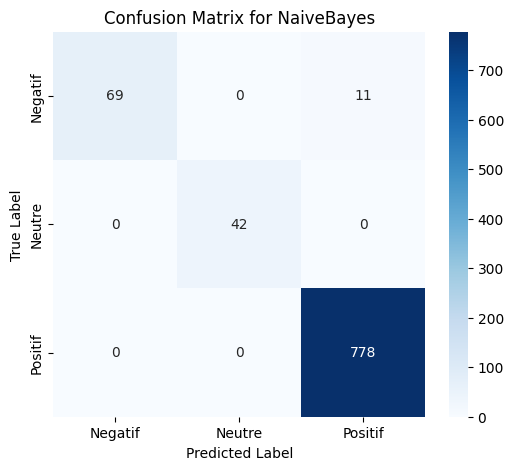

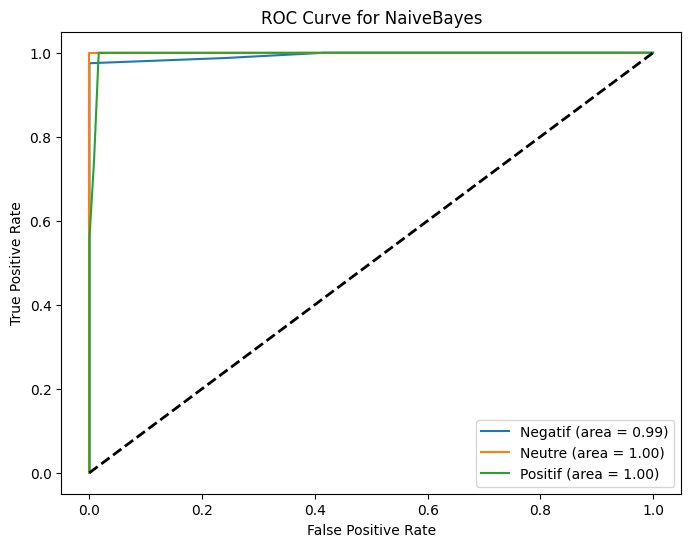

In [ ]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Assume 'SENTIMENT' is the target column with labels 'Positif', 'Négatif', 'Neutre'
# Encoding the target labels
label_encoder = LabelEncoder()
df['SENTIMENT'] = label_encoder.fit_transform(df['SENTIMENT'])
class_names = label_encoder.classes_

# Features and target variable
X = df[['SCORE']]  # Use 'SCORE' as a feature; extend with other features as needed
y = df['SENTIMENT']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Models to evaluate
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVC': SVC(probability=True),
    'NaiveBayes': GaussianNB()
}

# Convert class names to string format to avoid TypeError
class_names = label_encoder.classes_.astype(str)

# Evaluate each model
results = {}

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predictions and probability scores for ROC AUC
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Accuracy and F1 Score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # ROC AUC Score (One-vs-Rest for multi-class)
    if y_proba is not None:
        y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust classes if there are more or fewer classes
        roc_auc = roc_auc_score(y_test_bin, y_proba, average='weighted', multi_class='ovr')
    else:
        roc_auc = None

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Confusion Matrix": conf_matrix
    }

    # Print results for the model
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    if roc_auc:
        print(f"ROC AUC Score: {roc_auc:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))
    print("-" * 50)

    # Plotting the Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Plotting the ROC Curve
    if y_proba is not None:
        plt.figure(figsize=(8, 6))
        for i in range(len(class_names)):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            plt.plot(fpr, tpr, label=f'{class_names[i]} (area = {auc(fpr, tpr):.2f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve for {model_name}")
        plt.legend(loc="lower right")
        plt.show()


In [ ]:
test_df

,Questions,CILUBA,FRANCAIS,ENGLISH,AFRIKAANS,ZULU,XHOSA,CILUBA,FRANCAIS,ENGLISH,AFRIKAANS,ZULU,XHOSA
0,Why do you sleep when the sun shines?,buabualukayi wewa tulu when munya shines?,pourquoi toi someil when soleil shines?,why you sleep when sun shines?,hoekom jy slaap when son shines?,kungani wena lala when ilanga shines?,ngoba wena ukulala when ilanga shines?,"(1.0, Positif)","(1.0, Positif)","(1.0, Positif)","(1.0, Positif)","(1.0, Positif)","(1.0, Positif)"
1,Why do you eat but still feel hunger?,buabualukayi wewa kudia but still feel nzala,pourquoi toi manger but still feel faim,why you eat but still feel hunger?,hoekom jy eet but still feel honger,kungani wena dla but still feel indlala,ngoba wena yitya but still feel indlala,"(1.0, Positif)","(1.0, Positif)","(1.0, Positif)","(1.0, Positif)","(1.0, Positif)","(1.0, Positif)"
2,Why do you run away from me?,buabualukayi wewa kunyema away from mema,pourquoi toi courir away from moi,why you run away from me?,hoekom jy hardloop away from ek,kungani wena gijima away from mina,ngoba wena baleka away from mna,"(0.3333333333333333, Positif)","(0.3333333333333333, Positif)","(0.3333333333333333, Positif)","(0.3333333333333333, Positif)","(0.3333333333333333, Positif)","(0.3333333333333333, Positif)"
3,Why do you cry when you are happy?,buabualukayi wewa kudila when wewa are musangala,pourquoi toi pleurer when toi are heureux,why you cry when you are happy?,hoekom jy huil when jy are gelukkig,kungani wena khala when wena are ngijabule,ngoba wena khala when wena are ndonwabile,"(0.14285714285714285, Positif)","(0.14285714285714285, Positif)","(0.14285714285714285, Positif)","(0.14285714285714285, Positif)","(0.14285714285714285, Positif)","(0.14285714285714285, Positif)"
4,Why do you laugh at my pain?,buabualukayi wewa kukenya at my pain?,pourquoi toi rire at my pain?,why you laugh at my pain?,hoekom jy lag at my pain?,kungani wena hleka at my pain?,ngoba wena hleka at my pain?,"(0.6666666666666666, Positif)","(0.8333333333333334, Positif)","(0.6666666666666666, Positif)","(0.6666666666666666, Positif)","(0.6666666666666666, Positif)","(0.6666666666666666, Positif)"
5,Why do you sing songs of sorrow?,buabualukayi wewa kuimba songs sorrow?,pourquoi toi chanter songs sorrow?,why you sing songs sorrow?,hoekom jy sing songs sorrow?,kungani wena cula songs sorrow?,ngoba wena cula songs sorrow?,"(0.4, Positif)","(0.4, Positif)","(0.4, Positif)","(0.4, Positif)","(0.4, Positif)","(0.4, Positif)"
6,Why do you dance alone in the dark?,buabualukayi wewa maja alone dark?,pourquoi toi danse alone dark?,why you dance alone dark?,hoekom jy dans alone dark?,kungani wena umdanso alone dark?,ngoba wena umdaniso alone dark?,"(0.2, Positif)","(0.2, Positif)","(0.2, Positif)","(0.2, Positif)","(0.2, Positif)","(0.2, Positif)"
7,Why do you think about the past?,buabualukayi wewa merci bwalu past?,pourquoi toi penser propos past?,why you think about past?,hoekom jy dink oor past?,kungani wena cabanga mayelana past?,ngoba wena cinga malunga past?,"(1.6, Positif)","(1.6, Positif)","(1.6, Positif)","(1.0, Positif)","(1.6, Positif)","(1.6, Positif)"
8,Why do you fear what you cannot see?,buabualukayi wewa bowa what wewa cannot kumuana,pourquoi toi peur what toi cannot voir,why you fear what you cannot see?,hoekom jy vrees what jy cannot sien,kungani wena ukwesaba what wena cannot bona,ngoba wena uloyiko what wena cannot bona,"(0.2857142857142857, Positif)","(0.2857142857142857, Positif)","(0.2857142857142857, Positif)","(0.2857142857142857, Positif)","(0.0, Neutre)","(0.2857142857142857, Positif)"
9,Why do you love and then hate me?,buabualukayi wewa dinanga then kukina mema,pourquoi toi amour then détester moi,why you love then hate me?,hoekom jy liefde then haat ek,kungani wena uthando then inzondo mina,ngoba wena uthando then inzondo mna,"(0.16666666666666666, Positif)","(0.16666666666666666, Positif)","(0.16666666666666666, Positif)","(0.16666666666666666, Positif)","(0.16666666666666666, Positif)","(0.